### Цель

Цель - исследования дать рекомендации по удержанию клиентов тем самым снизив их отток.

### Подключение библиотек

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Чтение данных

In [148]:
# Загрузим датасет и посмотрим на структуру данных
df = pd.read_csv("Customer-Churn-Records.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


1. RowNumber - номер строки
2. CustomerId - ID клиента
3. Surname - фамилия
4. CreditScore - кредитный рейтинг
5. Geography - страна
6. Gender - пол
7. Age - возраст
8. Tenure - частота использования кредитной карты
9. Balance - баланс
10. NumOfProducts - количество продуктов банка
11. HasCrCard - наличие кредитной карты
12. IsActiveMember - активный клиент
13. EstimatedSalary - предполагаемая зарплата клиента
14. Exited - покинул банк
15. Complain - есть ли жалобы
16. Satisfaction Score - балл удовлетворенности
17. Card Type - класс карты
18. Point Earned - баллы

In [149]:
# Удалим очевидно ненужные столбцы
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [88]:
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Анализ данных

In [150]:
# Быстрая оценка данных

In [259]:
df_clean.shape

(10000, 15)

In [89]:
df_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [143]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [151]:
# На первый взгляд все хорошо, нет очевидных выбросов и пропущенных значений

In [152]:
# Посмортим на столбцы с фиксированным набором значений
for column in df_clean[['Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Geography', 'Card Type']].columns:
    print(column, df_clean[column].unique())

Gender ['Female' 'Male']
Age [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure [ 2  1  8  7  4  6  3 10  5  9  0]
NumOfProducts [1 3 2 4]
HasCrCard [1 0]
IsActiveMember [1 0]
Exited [1 0]
Complain [1 0]
Satisfaction Score [2 3 5 4 1]
Geography ['France' 'Spain' 'Germany']
Card Type ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [146]:
# Все даные корректны

### Исследование

In [147]:
# Построим гистограммы распределения по всем столбцам и наложим гистограммы с количеством ушедших

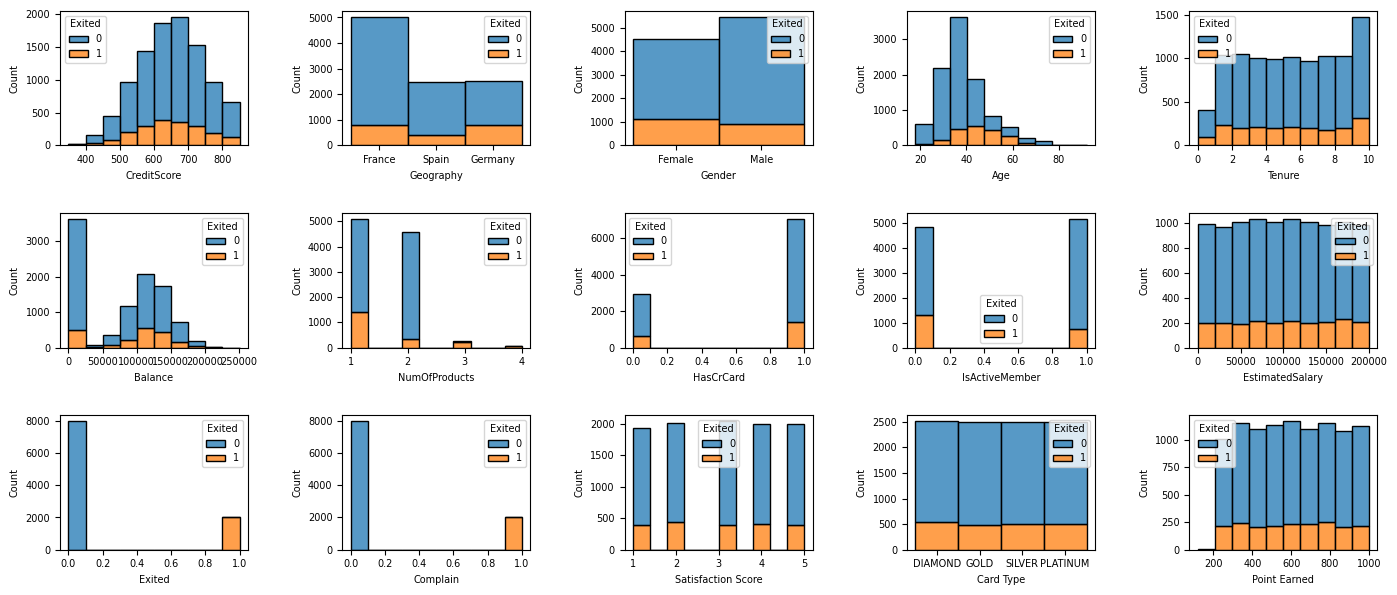

In [283]:
plt.rcParams["figure.figsize"] = (17,7)
plt.rcParams['font.size'] = '7'
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, column in enumerate(df_clean.columns):
    plt.subplot(3, len(df_clean.columns)//3, i+1)
    #plt.hist(df_clean[column], label='All')
    #plt.hist(df_clean[df_clean['Exited'] == True][column], label='Exited')
    sns.histplot(df_clean, x=column, hue='Exited', multiple='stack', bins=10);
    #plt.title(column)
    #if(i==0):
        #plt.legend()
plt.show()

In [145]:
# Построим матрицу корреляции

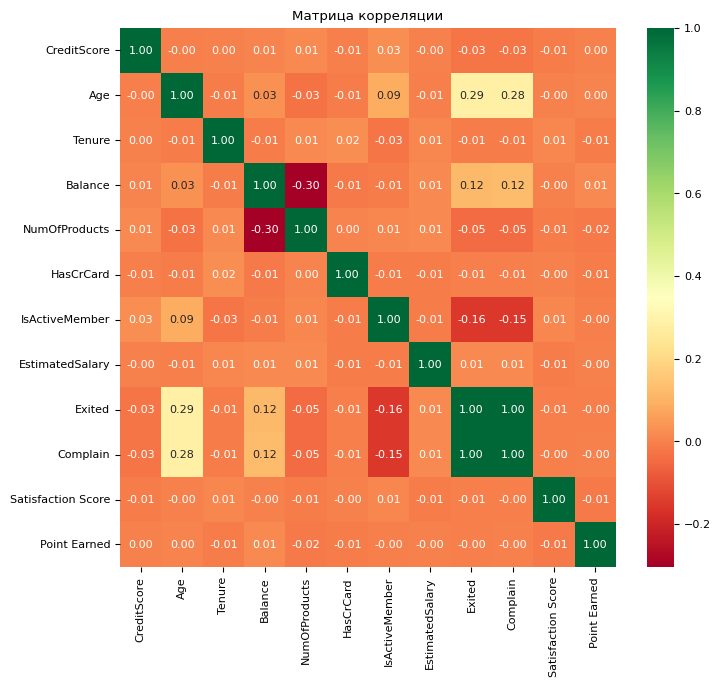

In [266]:
col_df = df_clean.select_dtypes(include=["int64","float64"]) 
plt.rcParams["figure.figsize"] = (8,7)
sns.heatmap(col_df.corr(), annot=True, cmap ='RdYlGn', fmt=".2f")
plt.title('Матрица корреляции');

In [144]:
# Из матрицы корреляции можно сделать выводы, что уход из банка зависит от Age, Balance, IsActiveMember, Complain (после жалоб правктически 100% вероятность ухода).
# Также при сравнении гистограмм распределения видно, что есть зависимость от Gender (женщины чаще меняют банк) и Geography (жители Германии активнее меняют банк)

In [239]:
# оставим только эти поля
df_clean_imp = df_clean[['Age', 'Balance', 'IsActiveMember', 'Complain', 'Gender', 'Geography', 'Exited']].copy()

# Gender - label encoded - Female=0, Male=1
# Geography - one-hot encoded
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()
df_clean_imp["Gender"] = df_clean_imp["Gender"].map({"Female": 0, "Male": 1})
df_clean_imp = pd.get_dummies(df_clean_imp, columns=["Geography"], drop_first=True)

# смотрим, что получилось
df_clean_imp.head(3)

,Age,Balance,IsActiveMember,Complain,Gender,Exited,Geography_Germany,Geography_Spain
0,42,0.00,1,1,0,1,False,False
1,41,83807.86,1,1,0,0,False,True
2,42,159660.80,0,1,0,1,False,False


In [240]:
X = df_clean_imp.drop("Exited", axis=1)
y = df_clean_imp["Exited"]

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [242]:
# нормализуем значения
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [243]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [244]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9985


In [255]:
# отличный результат, но по-моему Complain (корреляция равна 1) очень сильно влияет на результат и остальные параметры просто игнорируются

In [ ]:
# оставим один Complain и посмотрим, что получиться

In [254]:
X = df_clean_imp[["Complain"]]
y = df_clean_imp["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9985


In [249]:
# результат не изменился, но предсказывать уход клиентов по одному Complain не совсем верно, поэтому уберем его из датасета

In [252]:
X = df_clean_imp.drop(["Exited", "Complain"], axis=1)
y = df_clean_imp["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8085
